In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [5]:
# Load model
model = tf.keras.models.load_model("D:\Shraddha\Automatic Number Plate Recognition, OCR Web App in Python\[TutsNode.com] - Automatic Number Plate Recognition, OCR Web App in Python\Introduction\Project_Files\Labeling\models\object_detection.h5")
print("Model loaded sucessfully") 

Model loaded sucessfully


In [6]:
path = r"D:\Shraddha\Automatic Number Plate Recognition, OCR Web App in Python\[TutsNode.com] - Automatic Number Plate Recognition, OCR Web App in Python\Introduction\Project_Files\Labeling\test_images\OIP (3).jpg"
image = load_img(path) #PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 # convert into array and get the normalized output

In [7]:
# size of the original image
h, w, d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 225
Width of the image = 383


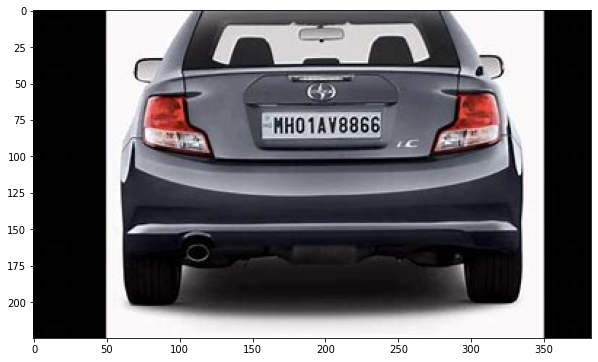

In [8]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [9]:
image_arr_224.shape

(224, 224, 3)

In [10]:
# need data in 4 dimension (increasing dimension) 1=number of images
test_arr = image_arr_224.reshape(1,224,224,3)

In [11]:
# make predictions
coords = model.predict(test_arr)
coords #gives normalized values

array([[0.41731977, 0.39163893, 0.47871026, 0.47733974]], dtype=float32)

In [12]:
#Denormalize output (coords)

denorm = np.array([w,w,h,h])
coords = coords * denorm  
coords

array([[159.83347368, 149.99771196, 107.70980939, 107.40144253]])

In [13]:
coords = coords.astype(np.int32)
coords

array([[159, 149, 107, 107]])

(159, 107) (149, 107)


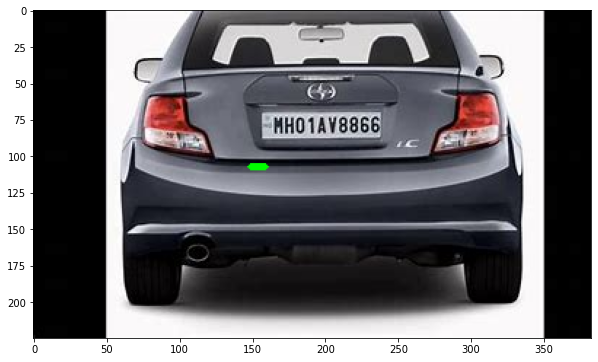

In [14]:
# Draw bounding on top of the image
xmin , xmax,ymin,ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

## Create pipeline

In [15]:
def object_detection(path):
    image = load_img(path) #PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # convert into array and get the normalized output
    h, w, d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    #Denormalize output (coords)
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # Draw bounding on top of the image
    xmin , xmax,ymin,ymax = coords[0]
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords


(665, 856) (1050, 663)


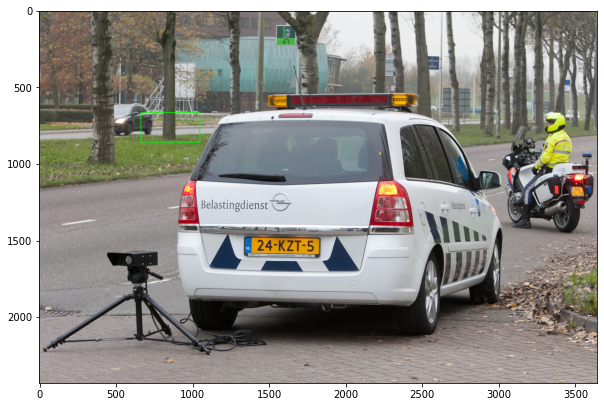

In [16]:
path = r"D:\Shraddha\Automatic Number Plate Recognition, OCR Web App in Python\[TutsNode.com] - Automatic Number Plate Recognition, OCR Web App in Python\Introduction\Project_Files\Labeling\test_images\N4.jpeg"
image, cods = object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR

In [17]:
    import pytesseract as pt

(665, 856) (1050, 663)


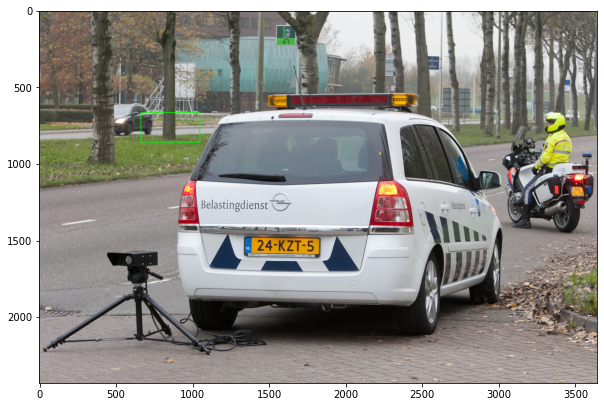

In [18]:
path = r"D:\Shraddha\Automatic Number Plate Recognition, OCR Web App in Python\[TutsNode.com] - Automatic Number Plate Recognition, OCR Web App in Python\Introduction\Project_Files\Labeling\test_images\N4.jpeg"
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

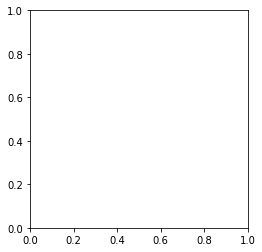

In [22]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

plt.imshow(roi)
plt.show()